In [1]:
%matplotlib inline
from cox import readers
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

In [2]:
r = readers.CollectionReader('../src/beta_kl_debug/agents')

100%|██████████| 2/2 [00:00<00:00,  3.40it/s]


In [3]:
metadata = r.df('metadata')
opt = r.df('optimization')
opt['opt_step'] = opt.index
#nadv = r.df('normalized_advantage')
#nadv['opt_step'] = (nadv.index % 50) * 10
constraints = r.df('paper_constraints_train')
constraints_heldout = r.df('paper_constraints_heldout')

In [4]:
games =  ["Humanoid-v2"]
code_level_opts = {
      #"kl_penalty_coeff": [0.1, 1, 3, 10],
      "kl_penalty_direction": ["new_to_old", "old_to_new"],
      #'clip_advantages': [1e8],
      #'norm_rewards': ['none', 'returns'],
      #'anneal_lr': [False, True],
      #'value_clipping': [False, True],
      #'initialization': ['xavier', 'orthogonal']
}

NUM_BINS = 20

In [5]:
#metadata['kl_penalty'] = (metadata['kl_penalty_coeff'] > 0)
key_metadata = metadata[['exp_id', 'game'] + list(code_level_opts.keys())]
#constraints = constraints.merge(key_metadata, on='exp_id')
#constraints_heldout = constraints_heldout.merge(key_metadata, on='exp_id')
#nadv = nadv.merge(key_metadata, on='exp_id')
opt = opt.merge(key_metadata, on='exp_id')

# Plot mean rewards

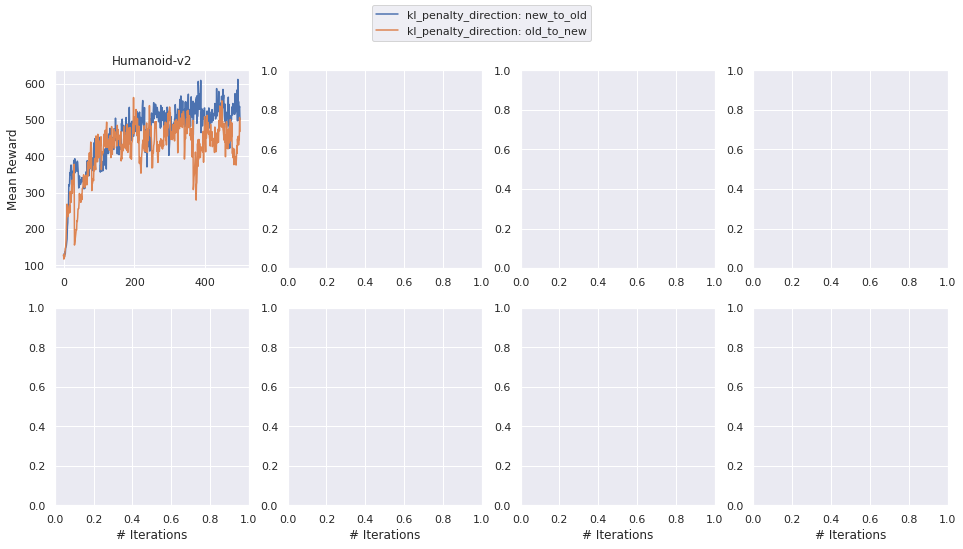

In [6]:
# Plot setup
fig, ax = plt.subplots(2, 4, figsize=(16,8))

for j, g in enumerate(games):
    for i, cl_opt in enumerate(code_level_opts):
        for b in code_level_opts[cl_opt]:
            filt = opt[(opt[cl_opt] == b) & (opt.game == g)]
            sns.lineplot(filt.opt_step, filt.mean_reward,
                         ax=ax.flatten()[j], label=f"{cl_opt}: {b}", legend=False)
        ax.flatten()[j].set_title(g)
        
for a in ax.flatten():
    a.set_ylabel('')
    a.set_xlabel('')
ax[0][0].set_ylabel('Mean Reward')
ax[1][0].set_xlabel('Mean Reward')
for a in ax[1]:
    a.set_xlabel('# Iterations')
    
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')

plt.show()

In [8]:
constraints['exp_id']

0     307e7aee-eb54-46da-b9e2-9ca4f7e3154e
1     307e7aee-eb54-46da-b9e2-9ca4f7e3154e
2     307e7aee-eb54-46da-b9e2-9ca4f7e3154e
3     307e7aee-eb54-46da-b9e2-9ca4f7e3154e
4     307e7aee-eb54-46da-b9e2-9ca4f7e3154e
                      ...                 
45    0ec7554c-c2a5-45a5-837a-eeddadcff9c8
46    0ec7554c-c2a5-45a5-837a-eeddadcff9c8
47    0ec7554c-c2a5-45a5-837a-eeddadcff9c8
48    0ec7554c-c2a5-45a5-837a-eeddadcff9c8
49    0ec7554c-c2a5-45a5-837a-eeddadcff9c8
Name: exp_id, Length: 100, dtype: object

In [9]:
constraints[constraints['exp_id'] == '307e7aee-eb54-46da-b9e2-9ca4f7e3154e']

,avg_kl_old_to_new,avg_kl_new_to_old,max_ratio,opt_step,exp_id
0,0.413313,0.404074,6.104754e+04,0,307e7aee-eb54-46da-b9e2-9ca4f7e3154e
1,0.333873,0.328074,3.287656e+05,10,307e7aee-eb54-46da-b9e2-9ca4f7e3154e
2,0.048306,0.048080,6.701714e+00,20,307e7aee-eb54-46da-b9e2-9ca4f7e3154e
3,4.638544,3.580267,2.128666e+08,30,307e7aee-eb54-46da-b9e2-9ca4f7e3154e
4,0.061088,0.060349,5.544959e+01,40,307e7aee-eb54-46da-b9e2-9ca4f7e3154e
5,0.063028,0.064039,1.841067e+01,50,307e7aee-eb54-46da-b9e2-9ca4f7e3154e
6,0.080623,0.077812,7.272633e+01,60,307e7aee-eb54-46da-b9e2-9ca4f7e3154e
7,0.079255,0.079539,6.250460e+01,70,307e7aee-eb54-46da-b9e2-9ca4f7e3154e
8,0.030922,0.030218,1.120202e+01,80,307e7aee-eb54-46da-b9e2-9ca4f7e3154e
9,0.065649,0.066743,3.537731e+01,90,307e7aee-eb54-46da-b9e2-9ca4f7e3154e


In [10]:
constraints[constraints['exp_id'] == '0ec7554c-c2a5-45a5-837a-eeddadcff9c8']

,avg_kl_old_to_new,avg_kl_new_to_old,max_ratio,opt_step,exp_id
0,0.332676,0.327222,24830.529297,0,0ec7554c-c2a5-45a5-837a-eeddadcff9c8
1,0.157000,0.155795,296.739563,10,0ec7554c-c2a5-45a5-837a-eeddadcff9c8
2,0.243694,0.236850,829.386658,20,0ec7554c-c2a5-45a5-837a-eeddadcff9c8
3,0.111209,0.113075,277.615601,30,0ec7554c-c2a5-45a5-837a-eeddadcff9c8
4,0.078622,0.077776,72.305107,40,0ec7554c-c2a5-45a5-837a-eeddadcff9c8
5,0.080652,0.082231,18.584120,50,0ec7554c-c2a5-45a5-837a-eeddadcff9c8
6,0.033510,0.033684,10.271243,60,0ec7554c-c2a5-45a5-837a-eeddadcff9c8
7,0.110808,0.109619,423.602783,70,0ec7554c-c2a5-45a5-837a-eeddadcff9c8
8,0.168104,0.166647,196.849258,80,0ec7554c-c2a5-45a5-837a-eeddadcff9c8
9,0.282322,0.283140,2450.990234,90,0ec7554c-c2a5-45a5-837a-eeddadcff9c8
